# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description

This data set contains information about 10,866 movies collected from The Movie Database (TMDb).
The following features (columns) are contained in the dataset: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.
This made the dataset to have a total of 10866 and 21 columns.

After looking through the dataset, I coined the questions that could be answered by working with this data. Hence, I decided to drop the columns that are not very relevant and  that have lesser relevance to answering the questions.
The dropped columns are homepage, tagline, keywords, overview, budget, revenue, release_date, and production_companies. This gesture changed number of columns to 13 instead of 21, and now I can begin the Data Analysis exercise on the reshaped dataset.

### Questions:
- `Top (10) ranking movies by popularity, votes and average vote`
- `Which Director released the most movies`
- `What 10 movies had the most profit`
- `Who is the best Director`
- `Why do movies have high revenues`

In [90]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to resolve the error of max_rows
pd.options.display.max_rows = 9999

In [91]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==1.1.5

<a id='wrangling'></a>
## Data Wrangling


>Loading the data

In [92]:
df  = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


### Data Cleaning
> Inspecting the data for data types present and the shape of the dataset

In [93]:
# A function to briefly inspect the dataframe
def inspect(df):
    """
        This fuction prints the shape of the passed in dataframe and its first two rows.
    """
    print(f'The dataframe has {df.shape[0]} rows, and {df.shape[1]} columns.')
    return df.head(2)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [95]:
inspect(df)

The dataframe has 10866 rows, and 21 columns.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> After checking and being satisfied with the data tpes for each column, proceeded to drop the irrelevant columns and verify the new data shape

In [96]:
df.drop(['homepage','tagline','keywords','overview','budget','revenue','release_date','production_companies'], axis = 1, inplace = True)

In [97]:
inspect(df)

The dataframe has 10866 rows, and 13 columns.


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


> Checking for the null values in the dataset, discovered null values in imdb_id, cast, genres, and director columns.
Decided to drop the null values along the rows axis.

In [98]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [99]:
# drop the only rows with NA values
df_v1 = df.dropna(axis = 0)


In [100]:
# checked the data outlook to verify everything is in order.
inspect(df_v1)

The dataframe has 10727 rows, and 13 columns.


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis



### Q1.Top (10) ranking movies by popularity, votes and average vote

>Made a copy of the trimmed data

In [101]:
clean_df = df_v1.copy()

In [102]:
inspect(clean_df)

The dataframe has 10727 rows, and 13 columns.


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


>To get the top 10 movies, I need to check what the distribution of the values for these parameters are, so that I can form a baseline for ranking the movies by these parameters.

In [103]:
clean_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10727.000000,10727.000000,10727.000000,10727.000000,10727.000000,10727.000000,1.072700e+04,1.072700e+04
mean,65183.621982,0.652774,102.492682,219.894845,5.964128,2001.256829,1.777472e+07,5.202571e+07
std,91462.138857,1.004948,30.472103,578.908417,0.930188,12.821642,3.447079e+07,1.454488e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.500000,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20312.000000,0.387190,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73938.000000,0.721488,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.473569e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Get dataframe of top ranking movies where votes rating is not less than the mean, and the number of votes casted is no less than median votes (I used median because of the large difference between the mean and median, which implies skewness. In this case, the median is more robust). This gives a fairer ranking baseline.

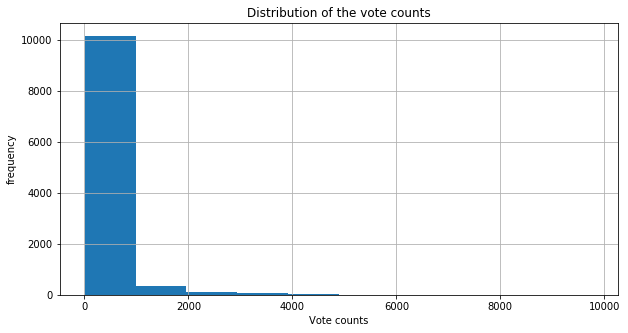

In [105]:
clean_df['vote_count'].hist(figsize = (10,5))
plt.title('Distribution of the vote counts')
plt.xlabel('Vote counts')
plt.ylabel('frequency')
plt.show()

> The above plot shows the distribution of the number of votes each movie recorded. As seen, the distribution is skewed to the right and informs that using the mean as a measure of central tendency is not robust enough as it would be pulled to one side of the distribution. The median is much recommended in such cases.

In [106]:
top_voted_movies= clean_df.query('vote_count >= {}'.format(clean_df['vote_count'].median())).query('vote_average >= {}'.format(clean_df['vote_average'].mean()))
inspect(top_voted_movies)


The dataframe has 3329 rows, and 13 columns.


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


> Get the 10 most popular movies from the top vote, using popularity score.

In [107]:
# get the top 10 movies with highest popularity from the top voted movie list
top_ten_movies = pd.DataFrame(top_voted_movies.nlargest(10, 'popularity')[['original_title','director']])

In [108]:
# Rank the movies in ascending order
top_ten_movies['Ranking'] = [x for x in np.arange(1,11)]
top_ten_movies

,original_title,director,Ranking
0,Jurassic World,Colin Trevorrow,1
1,Mad Max: Fury Road,George Miller,2
629,Interstellar,Christopher Nolan,3
630,Guardians of the Galaxy,James Gunn,4
2,Insurgent,Robert Schwentke,5
631,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,6
1329,Star Wars,George Lucas,7
632,John Wick,Chad Stahelski|David Leitch,8
3,Star Wars: The Force Awakens,J.J. Abrams,9
633,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,10


In [109]:
list(top_ten_movies.original_title)

['Jurassic World',
 'Mad Max: Fury Road',
 'Interstellar',
 'Guardians of the Galaxy',
 'Insurgent',
 'Captain America: The Winter Soldier',
 'Star Wars',
 'John Wick',
 'Star Wars: The Force Awakens',
 'The Hunger Games: Mockingjay - Part 1']

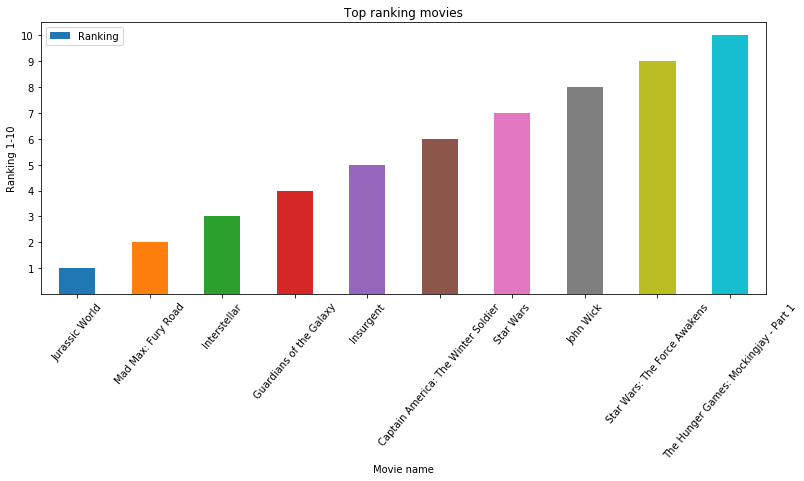

In [114]:
# visualize the top 10 movies
top_ten_movies.plot(rot = 50 ,figsize = (13,5),x = 'original_title',y = 'Ranking',kind = 'bar', title = 'Top ranking movies', yticks = ([x for x in np.arange(1,11)]));
plt.xlabel('Movie name')
plt.ylabel('Ranking 1-10')
plt.legend()
plt.show()


> The **above** plot shows the top ranking movies in an ascending order of 1 - 10.

## 2. Which Director released the most movies?

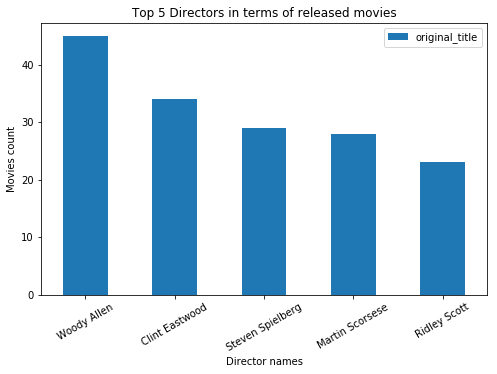

In [115]:
clean_df.groupby('director')[['original_title']].count().nlargest(5,'original_title').plot(kind = 'bar', rot = 30,figsize = (8,5));
plt.title('Top 5 Directors in terms of released movies')
plt.ylabel('Movies count')
plt.xlabel('Director names')
plt.show()

> The above graph represents the list of 5 directors, ranking them by the number of movies they have released.

In [116]:
# alternative means to view the Director with the most movies release
clean_df['director'].value_counts().head(1)


Woody Allen    45
Name: director, dtype: int64

## 3. What 10 movies had the most profit?

> Added a column that gets the profit margin as the difference between the adjusted budget and revenue generated in Billion Dollars.

In [117]:
clean_df['profit_billion_dollar'] =  (clean_df['revenue_adj'].sub(clean_df['budget_adj']))/1000000000

In [118]:
# sorting the resultant Dataframe in a Descending order
sorted_data_by_profit= clean_df.sort_values(by = 'profit_billion_dollar', axis = 0, ascending = False)

In [119]:
inspect(sorted_data_by_profit)

The dataframe has 10727 rows, and 14 columns.


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_billion_dollar
1329,11,tt0076759,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137
1386,19995,tt0499549,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237


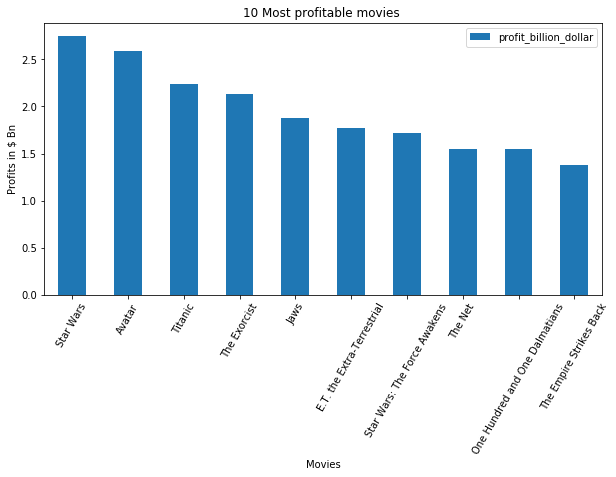

In [120]:
sorted_data_by_profit.head(10)[['profit_billion_dollar','original_title']].plot(figsize = (10,5),rot =60,kind = 'bar',x = 'original_title', title = '10 Most profitable movies ');

plt.xlabel('Movies')
plt.ylabel('Profits in $ Bn')
plt.show()



> The **above** visualization represents the movies that recorded the most profits (revenue - budget) in a descending order (most - least profitable movie)

## 4. Who is the best Director

In [121]:
# Director with the highest ranking movies
top_movie_director = top_voted_movies.nlargest(1, 'popularity')[['director','original_title']]

In [122]:
top_movie_director

,director,original_title
0,Colin Trevorrow,Jurassic World


In [123]:
# Alternatively, using the information from the top ten movies
top_ten_movies[['director', 'original_title']].head(1)

,director,original_title
0,Colin Trevorrow,Jurassic World


## 5. Why do movies have high revenues

In [124]:
# Check the description of the cleaned data for possible insights
clean_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_billion_dollar
count,10727.000000,10727.000000,10727.000000,10727.000000,10727.000000,10727.000000,1.072700e+04,1.072700e+04,10727.000000
mean,65183.621982,0.652774,102.492682,219.894845,5.964128,2001.256829,1.777472e+07,5.202571e+07,0.034251
std,91462.138857,1.004948,30.472103,578.908417,0.930188,12.821642,3.447079e+07,1.454488e+08,0.125964
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-0.413912
25%,10546.500000,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000
50%,20312.000000,0.387190,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000
75%,73938.000000,0.721488,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.473569e+07,0.013859
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137


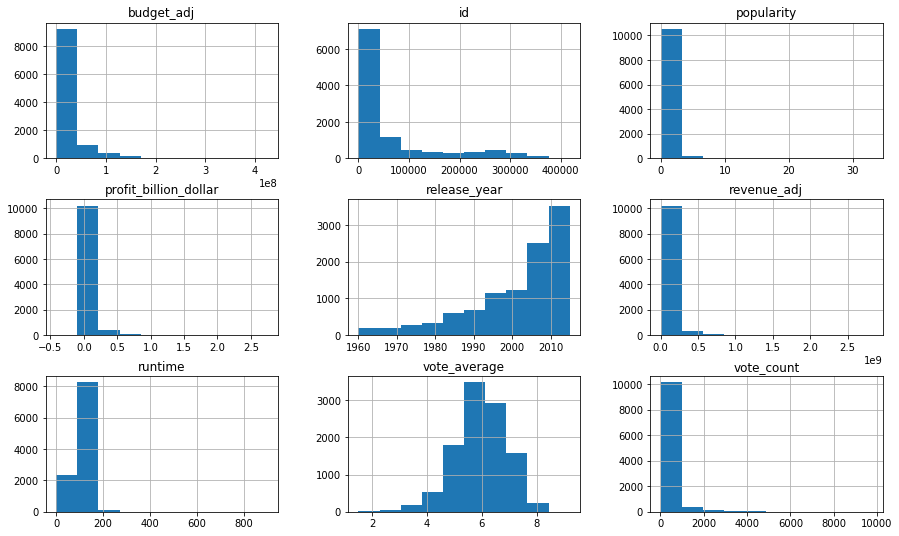

In [125]:
# checking the clean dataset's distribution
clean_df.hist(figsize = (15,9))
plt.show()

> The **above** plot represents the distribution of each column, showing the nature of skewness for each column, and it is obvious that only vote_average has a fairly normal distribution.

In [126]:
# Further to the above, I attepmted to look at the possible correlations between columns. Correlation is not causation though!
clean_df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_billion_dollar
id,1.000000,-0.009323,-0.083455,-0.032708,-0.072201,0.510368,-0.186960,-0.137070,-0.107109
popularity,-0.009323,1.000000,0.138093,0.800618,0.218177,0.093158,0.512063,0.608368,0.562344
runtime,-0.083455,0.138093,1.000000,0.164849,0.178464,-0.118862,0.222426,0.177281,0.143836
vote_count,-0.032708,0.800618,0.164849,1.000000,0.260838,0.110412,0.586257,0.707502,0.656509
vote_average,-0.072201,0.218177,0.178464,0.260838,1.000000,-0.128188,0.100198,0.199703,0.203174
release_year,0.510368,0.093158,-0.118862,0.110412,-0.128188,1.000000,0.019549,-0.064877,-0.080262
budget_adj,-0.186960,0.512063,0.222426,0.586257,0.100198,0.019549,1.000000,0.645891,0.472145
revenue_adj,-0.137070,0.608368,0.177281,0.707502,0.199703,-0.064877,0.645891,1.000000,0.977933
profit_billion_dollar,-0.107109,0.562344,0.143836,0.656509,0.203174,-0.080262,0.472145,0.977933,1.000000


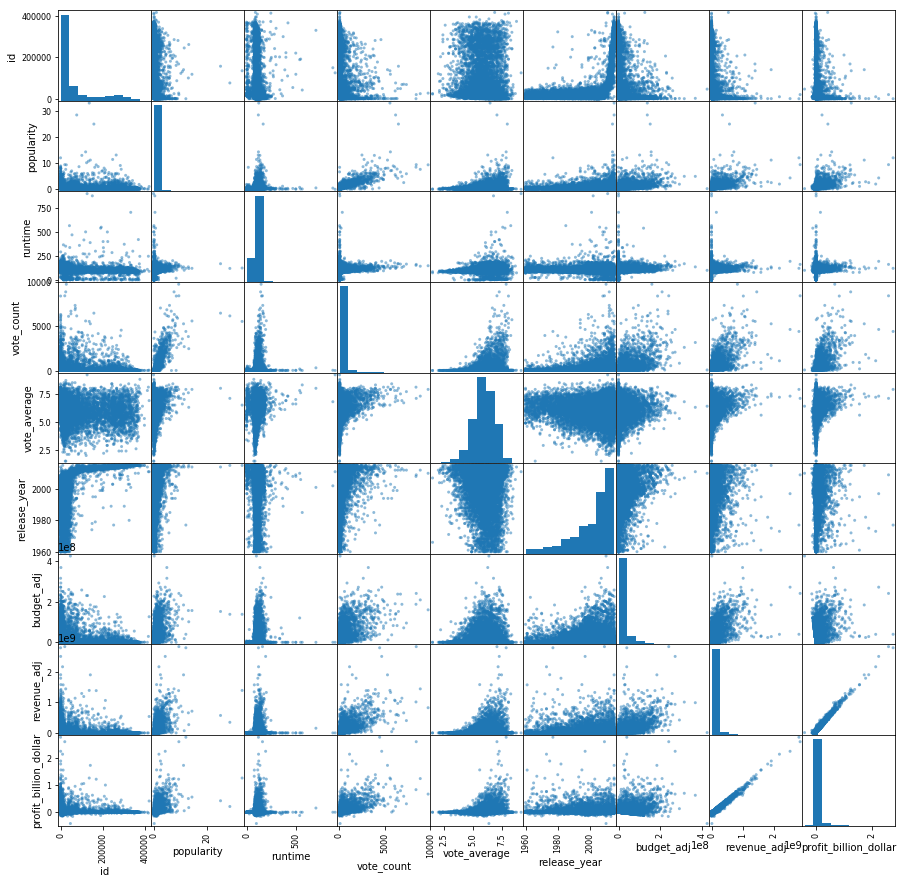

In [127]:
# Visualizing the correlation for easier insights
pd.plotting.scatter_matrix(clean_df,figsize = (15,15))
plt.show()

> The **above** plot depicts the pair correlation between all the columns. Interestingly the revenue is seen to be more correlated with vote count, popularity of the movie, and the allocated budget used for making the movie. This makes sense!

<a id='conclusions'></a>

## Conclusions

**Top (10) ranking movies by popularity, votes and average vote** `The top 10 movies are as follows: 
Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Star Wars: The Force Awakens, Avatar, Inception, Fight Club, The Lord of the Rings: The Fellowship of the Ring, The Dark Knight.`

**Which Director released the most movies** `Woody Allen is released the most movies, with a total of 45 movies released under his directorship`

**What 10 movies had the most profit** ` The following movies had the most profit :
Star Wars, Avatar, Titanic, The Exorcist, Jaws, E.T. the Extra-Terrestrial, Star Wars: The Force Awakens, The Net, One Hundred and One Dalmatians, The Empire Strikes Back.`

**Who is the best Director**  `It is safe to conclude that, `<b>Colin Trevorrow</b> `who directed the highest ranking movie - Jurassic World, is considered the best Director`

**Why do movies have high revenues**
`We can deduce that the Adjusted Revenue is positively affected by budgets allocation, vote average, vote count and the popularity score of the movie.`

**Limitations** : 
- `I had errors loading the dataset, until I researched and found that there was a need to specify the max_rows when reading in the dataset`

- `I was going to ask some questions around the genre, but given the nature of the column (that is composition of multiple genres), I decide to drop it, but hopefully I can revisit this dataset at a later time to see if I can answer those question by further wrangling the data without tampering the data integrity`

**Additional research** 
- `Find out why the most popular movie is not the most profitable.` 
- `Also, to check and ascertain what factors affect the revenue geration of a released movie`

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0